### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import matplotlib
import seaborn as sns
from skimage.measure import find_contours
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import xtrack as xt
import json
import pickle

# Local imports
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



### 30 cm


In [2]:
# Define study
STUDY_NAME = "PU_function_all_optics"
COLLIDER = "collider_00"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)


df

normalized amplitude in xy-plane  \
beam  name base collider num_particles_per_bunch crossing_angle                                     
lhcb1 collider_00        6.000000e+10            100.0                                        4.5   
                                                 102.5                                        4.5   
                                                 105.0                                        4.5   
                                                 107.5                                        4.5   
                                                 110.0                                        4.5   
...                                                                                           ...   
      collider_02        1.400000e+11            160.0                                        4.5   
                                                 162.5                                        4.5   
                                                 165.0                                        4.5   
                                                 167.5                                        4.5   
                                                 170.0                                        4.5   

                                                                     qx  \
beam  name base collider num_particles_per_bunch crossing_angle           
lhcb1 collider_00        6.000000e+10            100.0           62.313   
                                                 102.5           62.313   
                                                 105.0           62.313   
                                                 107.5           62.313   
                                                 110.0           62.313   
...                                                                 ...   
      collider_02        1.400000e+11            160.0           62.313   
                                                 162.5           62.313   
                                                 165.0           62.313   
                                                 167.5           62.313   
                                                 170.0           62.313   

                                                                     qy   dqx  \
beam  name base collider num_particles_per_bunch crossing_angle                 
lhcb1 collider_00        6.000000e+10            100.0           60.318  15.0   
                                                 102.5           60.318  15.0   
                                                 105.0           60.318  15.0   
                                                 107.5           60.318  15.0   
                                                 110.0           60.318  15.0   
...                                                                 ...   ...   
      collider_02        1.400000e+11            160.0           60.318  15.0   
                                                 162.5           60.318  15.0   
                                                 165.0           60.318  15.0   
                                                 167.5           60.318  15.0   
                                                 170.0           60.318  15.0   

                                                                  dqy  \
beam  name base collider num_particles_per_bunch crossing_angle         
lhcb1 collider_00        6.000000e+10            100.0           15.0   
                                                 102.5           15.0   
                                                 105.0           15.0   
                                                 107.5           15.0   
                                                 110.0           15.0   
...                                                               ...   
      collider_02        1.400000e+11            160.0           15.0   
                                                 162.5          

In [3]:
# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

# Reshape for plotting
df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot.index /= 1e11
df_to_plot


crossing_angle,100.0,102.5,105.0,107.5,110.0,112.5,115.0,117.5,120.0,122.5,...,147.5,150.0,152.5,155.0,157.5,160.0,162.5,165.0,167.5,170.0
num_particles_per_bunch,,,,,,,,,,,,,,,,,,,,,
0.600,4.5,4.5,4.5,4.500,4.500,4.750,4.719,4.625,5.000,5.062,...,6.188,6.031,6.469,6.562,6.594,6.438,6.750,NaN,6.938,6.938
0.625,4.5,4.5,4.5,4.531,4.500,4.594,4.625,4.906,4.938,4.969,...,6.188,6.000,6.344,6.406,6.469,6.406,6.656,6.688,7.031,6.938
0.650,4.5,4.5,4.5,4.500,4.500,4.531,4.562,4.562,4.875,5.031,...,6.000,6.219,6.312,6.312,6.125,6.406,6.344,6.531,6.656,6.938
0.675,4.5,4.5,4.5,4.500,4.500,4.500,4.500,4.625,4.812,4.969,...,6.125,5.875,6.312,6.250,6.438,6.281,6.688,6.562,6.500,6.625
0.700,4.5,4.5,4.5,4.500,4.531,4.594,4.500,4.531,4.594,4.875,...,6.062,6.031,6.062,6.281,6.156,6.469,NaN,6.531,6.625,6.844
0.725,4.5,4.5,4.5,4.500,4.500,4.531,4.500,4.656,4.656,4.938,...,5.875,5.906,6.219,5.969,6.156,6.375,6.438,6.344,6.656,6.594
0.750,4.5,4.5,4.5,4.500,4.500,4.500,4.531,4.500,4.750,4.781,...,5.750,5.875,5.906,6.125,6.281,6.219,6.219,6.469,6.500,6.625
0.775,4.5,4.5,4.5,4.500,4.500,4.531,4.500,4.500,4.656,4.719,...,5.719,5.906,6.031,6.188,6.000,6.156,6.156,6.531,6.500,6.062
0.800,4.5,4.5,4.5,4.500,4.500,4.500,4.500,4.500,4.656,4.688,...,5.812,5.812,5.875,6.031,5.969,6.062,6.031,6.125,6.219,6.312


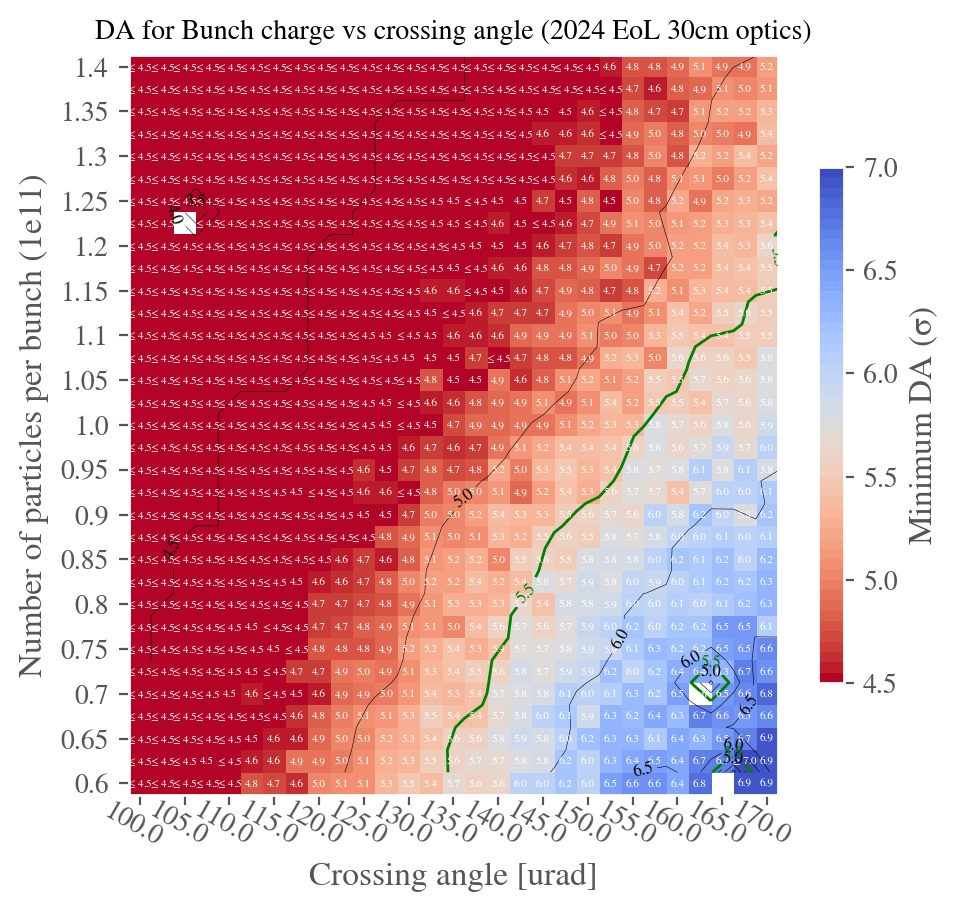

In [4]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 30cm optics)"
)


In [5]:
df_30_cm = df_to_plot.copy()

### 26cm

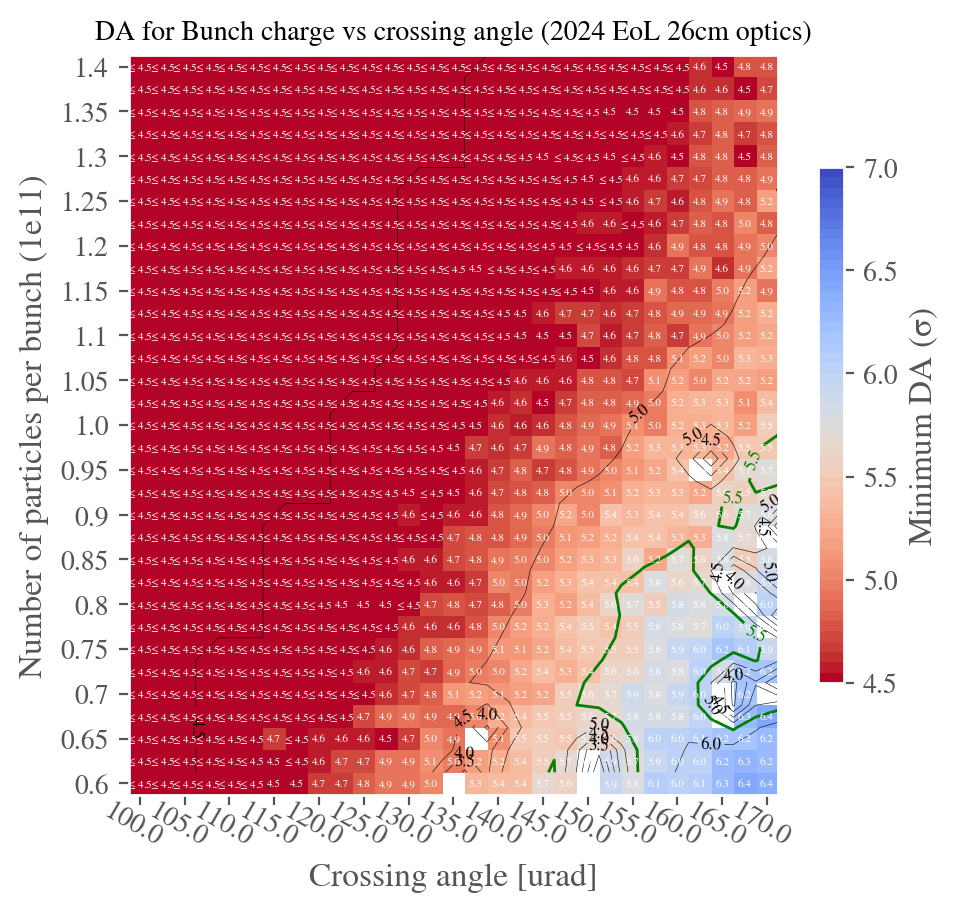

In [6]:
# Define study
STUDY_NAME = "PU_function_all_optics"
COLLIDER = "collider_01"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

# Reshape for plotting
df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot.index /= 1e11
# df_to_plot

# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 26cm optics)"
)

In [7]:
df_26_cm = df_to_plot.copy()

### 22 cm

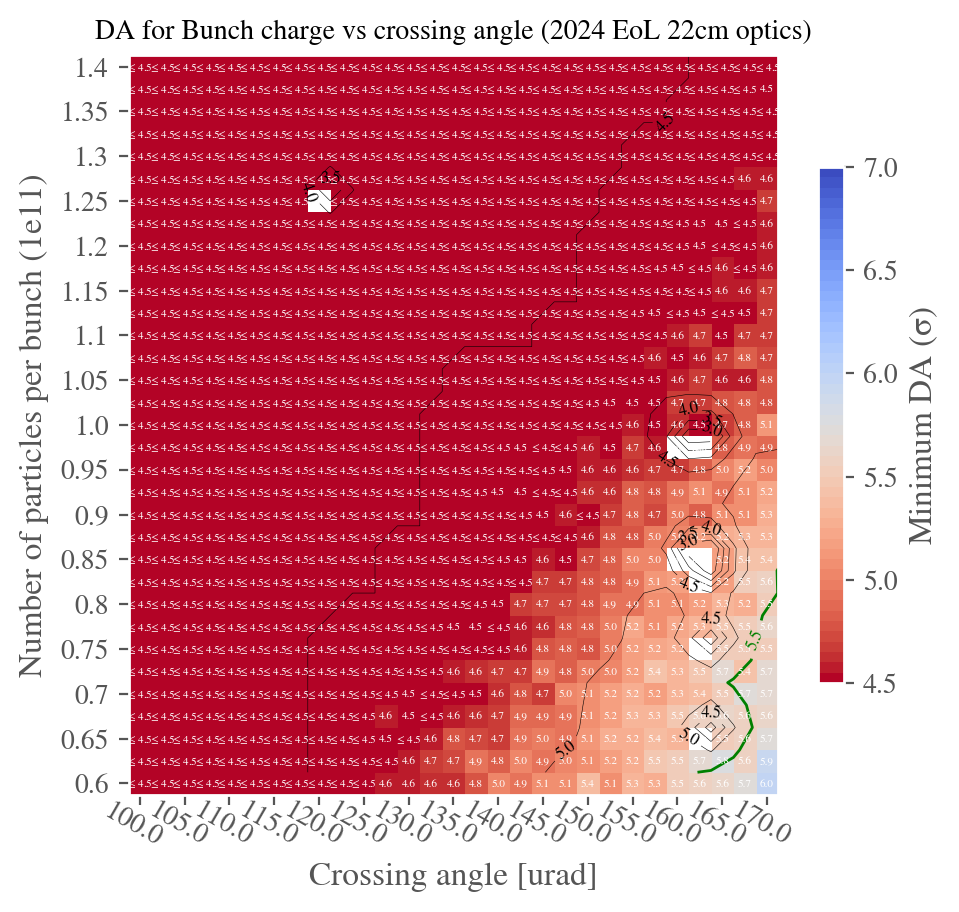

In [8]:
# Define study
STUDY_NAME = "PU_function_all_optics"
COLLIDER = "collider_02"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

# Reshape for plotting
df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot.index /= 1e11
# df_to_plot

# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 22cm optics)"
)

In [9]:
df_22_cm = df_to_plot.copy()

## Interpolate the data for each optics

In [10]:
from scipy import interpolate
import numpy as np

In [11]:
x = df_30_cm.index
y = df_30_cm.columns
array = np.ma.masked_invalid(df_30_cm.values.T)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]
interpolated_grid = interpolate.griddata((x1, y1), newarr.ravel(), (xx, yy), method='cubic')
interpolate_df_30cm = pd.DataFrame(interpolated_grid.T).interpolate(axis = 1)
interpolate_df_30cm.index = df_30_cm.index
interpolate_df_30cm.columns = df_30_cm.columns

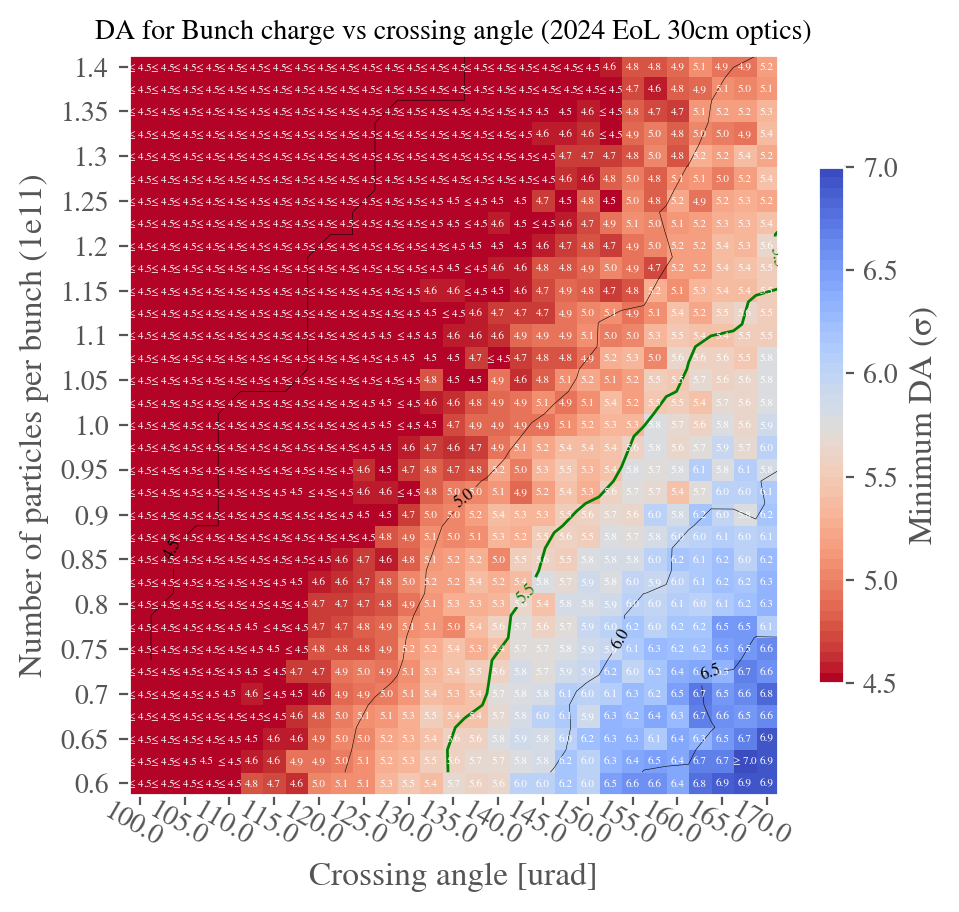

In [12]:
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    interpolate_df_30cm,
    '30cm_interpolated',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 30cm optics)"
)

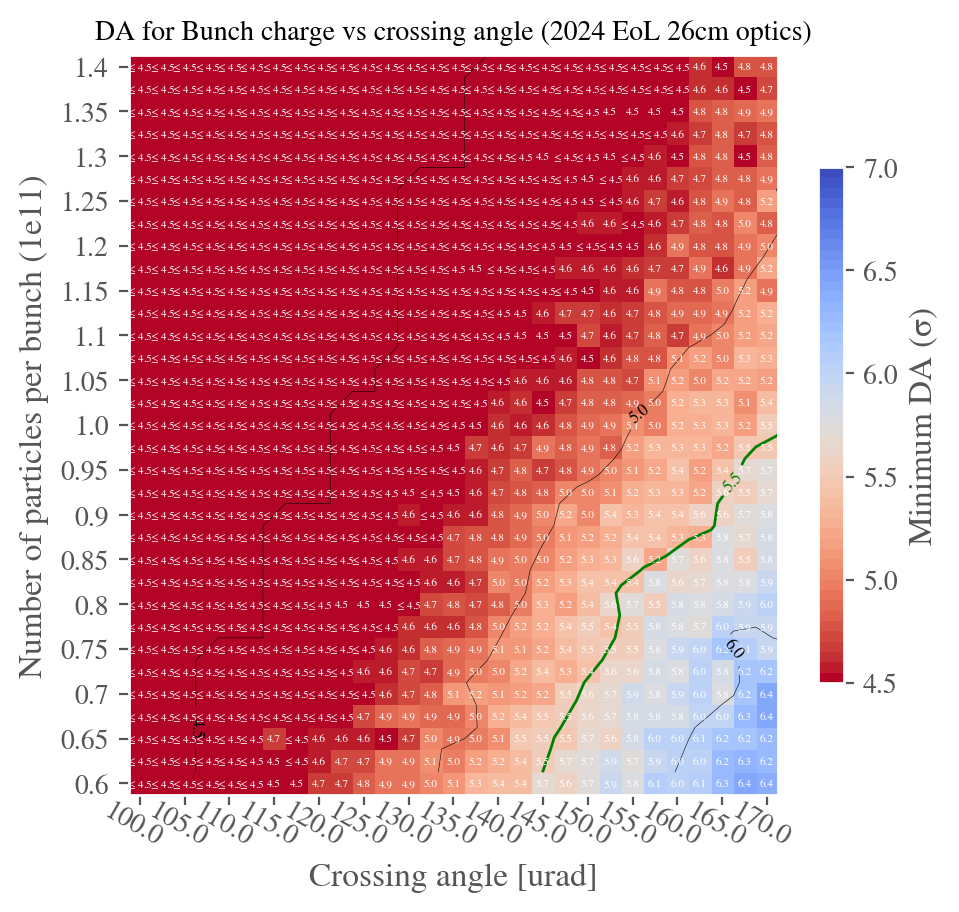

In [13]:
x = df_26_cm.index
y = df_26_cm.columns
array = np.ma.masked_invalid(df_26_cm.values.T)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]
interpolated_grid = interpolate.griddata((x1, y1), newarr.ravel(), (xx, yy), method='cubic')
interpolate_df_26cm = pd.DataFrame(interpolated_grid.T).interpolate(axis = 1)
interpolate_df_26cm.index = df_26_cm.index
interpolate_df_26cm.columns = df_26_cm.columns

conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    interpolate_df_26cm,
    '26cm_interpolated',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 26cm optics)"
)

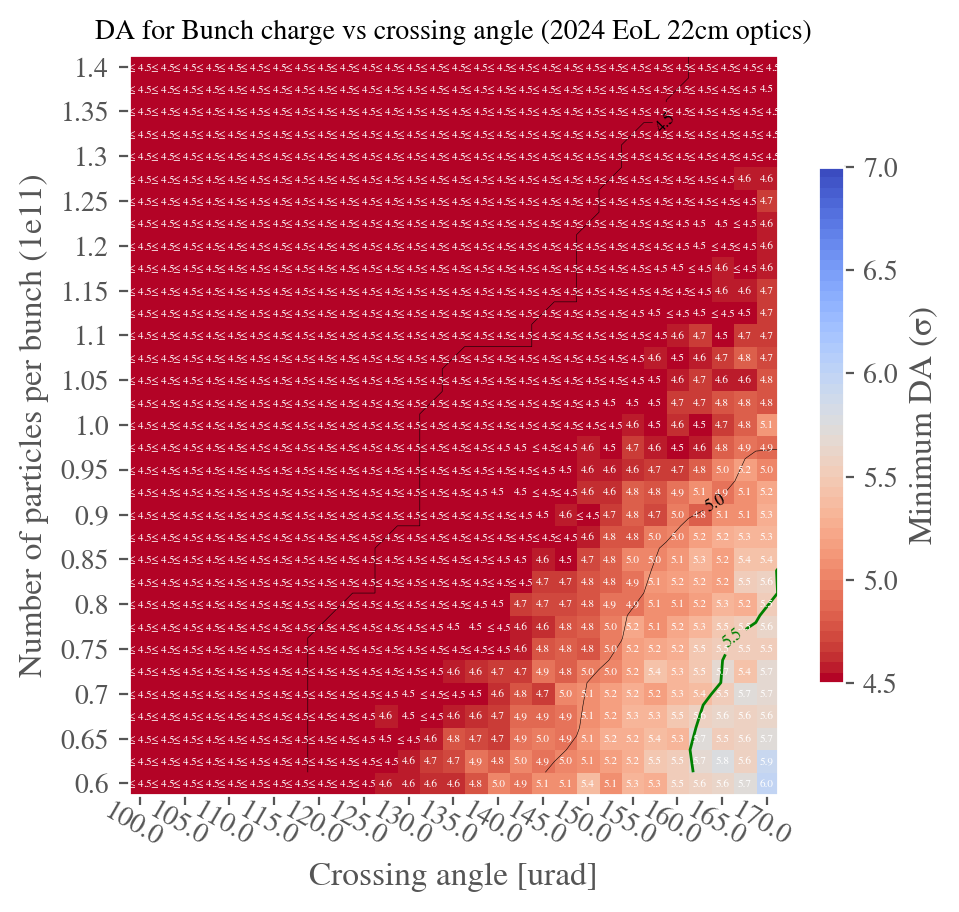

In [14]:
x = df_22_cm.index
y = df_22_cm.columns
array = np.ma.masked_invalid(df_22_cm.values.T)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]
interpolated_grid = interpolate.griddata((x1, y1), newarr.ravel(), (xx, yy), method='cubic')
interpolate_df_22cm = pd.DataFrame(interpolated_grid.T).interpolate(axis = 1)
interpolate_df_22cm.index = df_22_cm.index
interpolate_df_22cm.columns = df_22_cm.columns

conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    interpolate_df_22cm,
    '22cm_interpolated',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 22cm optics)"
)

### Find contours at 5.5 sigma

In [15]:
contours_30cm = find_contours(interpolate_df_30cm.values, level=5.5)

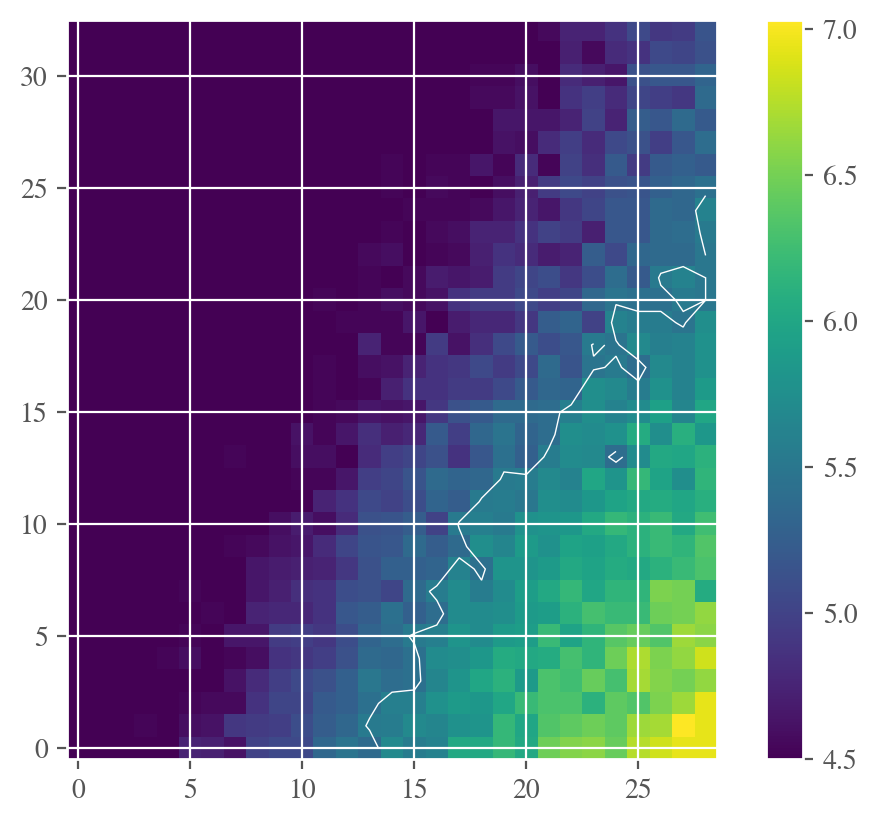

In [16]:
fig, ax = plt.subplots(1, 1)
img = ax.imshow(interpolate_df_30cm.values, origin='lower')
plt.colorbar(img)
for i in range(len(contours_30cm)):
    p = plt.Polygon(contours_30cm[i][:,[1,0]], fill=False, color='w', closed = False)
    ax.add_artist(p)
    
plt.show()

In [17]:
# Smooth a lot to have a smooth contour
smooth_30cm = gaussian_filter(interpolate_df_30cm.values, sigma=1)
contours_30cm = find_contours(smooth_30cm, level=5.5)


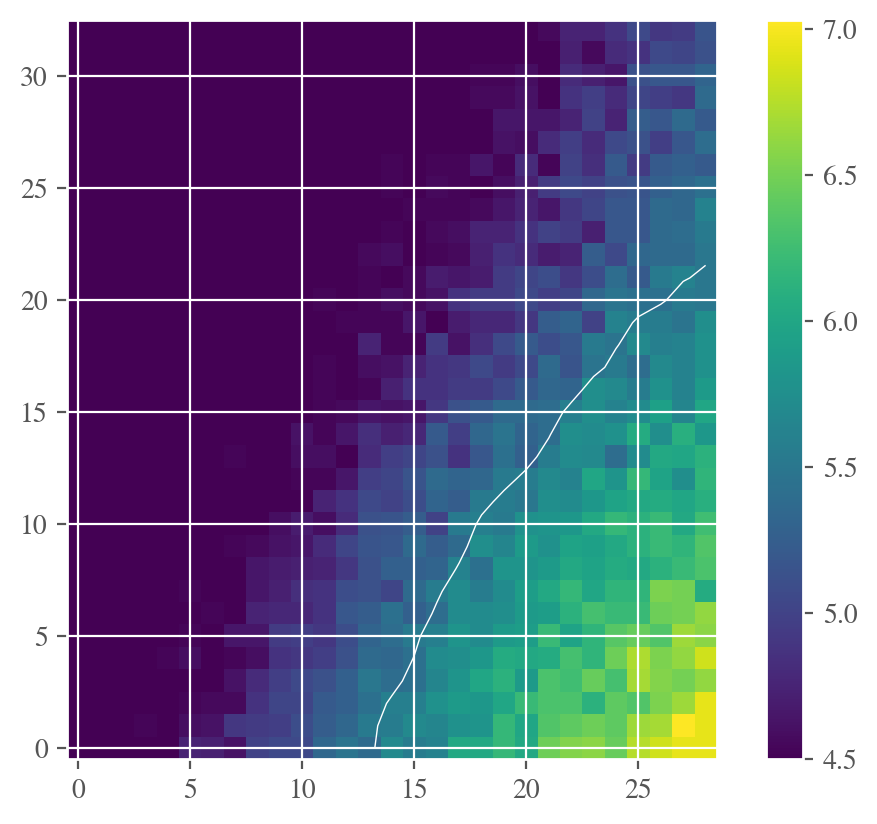

In [18]:
fig, ax = plt.subplots(1, 1)
img = ax.imshow(interpolate_df_30cm.values, origin='lower')
plt.colorbar(img)
for i in range(len(contours_30cm)):
    p = plt.Polygon(contours_30cm[i][:,[1,0]], fill=False, color='w', closed = False)
    ax.add_artist(p)
plt.show()

In [19]:
# Also get the same curve for 26cm and 22cm
smooth_26cm = gaussian_filter(interpolate_df_26cm.values, sigma=1)
contours_26cm = find_contours(smooth_26cm, level=5.5)

smooth_22cm = gaussian_filter(interpolate_df_22cm.values, sigma=1)
contours_22cm = find_contours(smooth_22cm, level=5.5)



In [20]:
# Apply better style
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

# %config InlineBackend.figure_format='pdf'

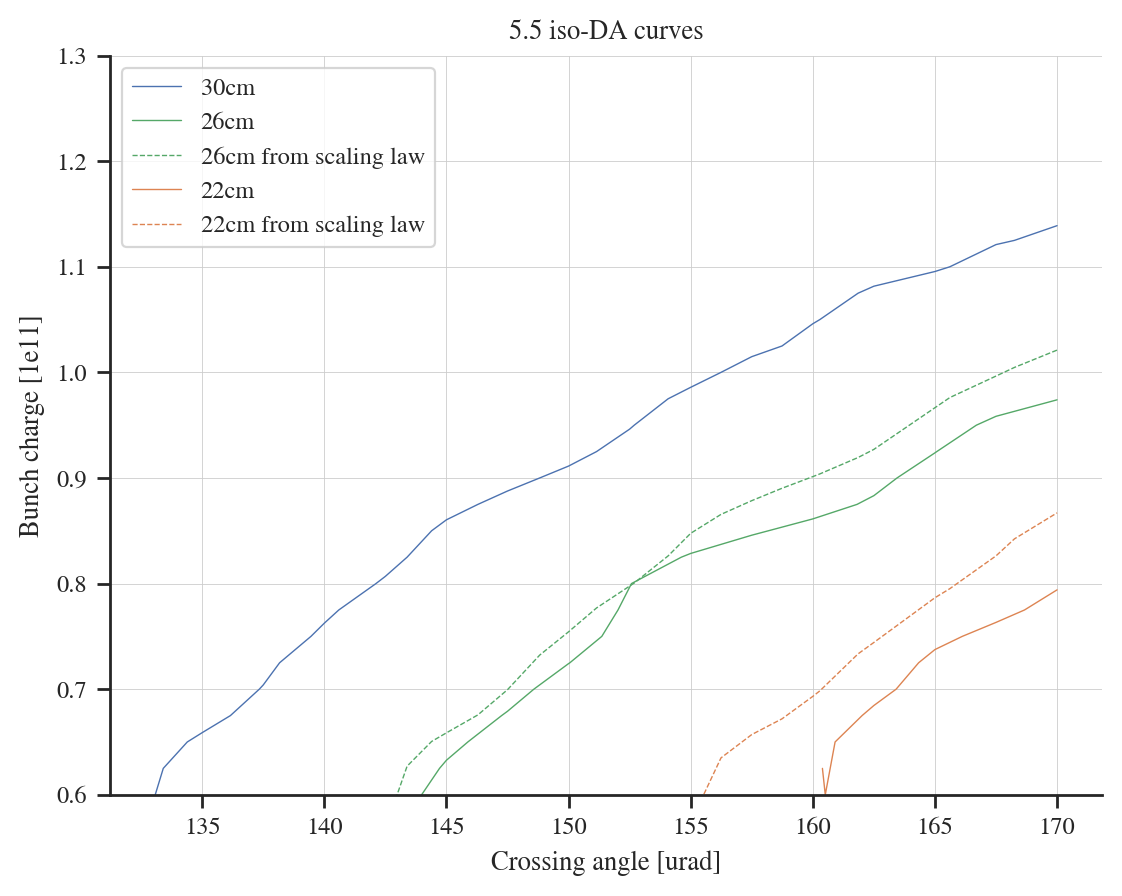

In [21]:
# Extract curve
contour_for_extraction_30cm = contours_30cm[0][contours_30cm[0][:, 1].argsort()]
contour_for_extraction_26cm = contours_26cm[0][contours_26cm[0][:, 1].argsort()]
contour_for_extraction_22cm = contours_22cm[0][contours_22cm[0][:, 1].argsort()]

x_30cm = contour_for_extraction_30cm[:,1]
y_30cm = contour_for_extraction_30cm[:,0]

x_26cm = contour_for_extraction_26cm[:,1]
y_26cm = contour_for_extraction_26cm[:,0]

x_22cm = contour_for_extraction_22cm[:,1]
y_22cm = contour_for_extraction_22cm[:,0]

# Convert back to initial units
f1 = interpolate.interp1d(range(len(df_30_cm.index)), df_30_cm.index)
f2 = interpolate.interp1d(range(len(df_30_cm.columns)), df_30_cm.columns)

x_real_30cm = f2(x_30cm)
y_real_30cm = f1(y_30cm)

x_real_26cm = f2(x_26cm)
y_real_26cm = f1(y_26cm)

x_real_22cm = f2(x_22cm)
y_real_22cm = f1(y_22cm)

# Compute rescaled 26cm and 22cm
f3 = interpolate.interp1d(x_real_30cm, y_real_30cm, bounds_error = False, fill_value = 'extrapolate')
rescaled_y_22cm = f3(x_real_30cm * np.sqrt(22/30))
rescaled_y_26cm = f3(x_real_30cm * np.sqrt(26/30))

plt.plot(x_real_30cm,y_real_30cm, color = 'C0', label = '30cm')

plt.plot(x_real_26cm,y_real_26cm, color = 'C2', label = '26cm')
plt.plot(x_real_30cm, rescaled_y_26cm, '--', color = 'C2', label = '26cm from scaling law')

plt.plot(x_real_22cm,y_real_22cm, color = 'C1', label = '22cm')
plt.plot(x_real_30cm, rescaled_y_22cm, '--', color = 'C1', label = '22cm from scaling law')
plt.xlabel("Crossing angle [urad]")
plt.ylabel("Bunch charge [1e11]")
plt.title("5.5 iso-DA curves")
plt.ylim(0.6, 1.3)
plt.legend()
plt.grid()
plt.savefig('plots/iso_DA_5dot5.pdf')
plt.show()

### Find contours at 5 sigma

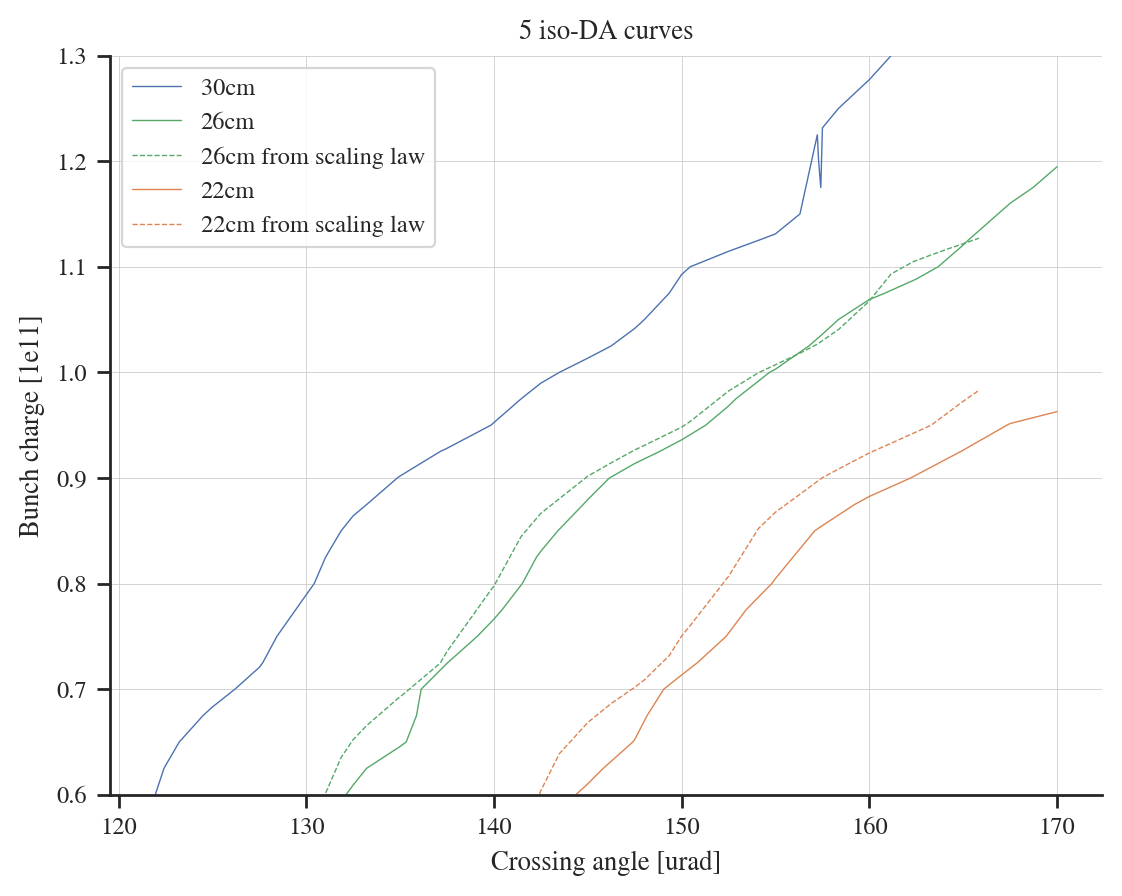

In [22]:
# Smooth to have a smooth contour
contours_30cm_5sig = find_contours(smooth_30cm, level=5)
contours_26cm_5sig = find_contours(smooth_26cm, level=5)
contours_22cm_5sig = find_contours(smooth_22cm, level=5)

# Extract curve
contour_for_extraction_30cm_5sig = contours_30cm_5sig[0][contours_30cm_5sig[0][:, 1].argsort()]
contour_for_extraction_26cm_5sig = contours_26cm_5sig[0][contours_26cm_5sig[0][:, 1].argsort()]
contour_for_extraction_22cm_5sig = contours_22cm_5sig[0][contours_22cm_5sig[0][:, 1].argsort()]

x_30cm_5sig = contour_for_extraction_30cm_5sig[:,1]
y_30cm_5sig = contour_for_extraction_30cm_5sig[:,0]

x_26cm_5sig = contour_for_extraction_26cm_5sig[:,1]
y_26cm_5sig = contour_for_extraction_26cm_5sig[:,0]

x_22cm_5sig = contour_for_extraction_22cm_5sig[:,1]
y_22cm_5sig = contour_for_extraction_22cm_5sig[:,0]

# Convert back to initial units
f1 = interpolate.interp1d(range(len(df_30_cm.index)), df_30_cm.index)
f2 = interpolate.interp1d(range(len(df_30_cm.columns)), df_30_cm.columns)

x_real_30cm_5sig = f2(x_30cm_5sig)
y_real_30cm_5sig = f1(y_30cm_5sig)

x_real_26cm_5sig = f2(x_26cm_5sig)
y_real_26cm_5sig= f1(y_26cm_5sig)

x_real_22cm_5sig = f2(x_22cm_5sig)
y_real_22cm_5sig = f1(y_22cm_5sig)

# Compute rescaled 26cm and 22cm
f3 = interpolate.interp1d(x_real_30cm_5sig, y_real_30cm_5sig, bounds_error = False, fill_value = 'extrapolate')
rescaled_y_22cm_5sig = f3(x_real_30cm_5sig * np.sqrt(22/30))
rescaled_y_26cm_5sig = f3(x_real_30cm_5sig * np.sqrt(26/30))

plt.plot(x_real_30cm_5sig,y_real_30cm_5sig, color = 'C0', label = '30cm')

plt.plot(x_real_26cm_5sig,y_real_26cm_5sig, color = 'C2', label = '26cm')
plt.plot(x_real_30cm_5sig, rescaled_y_26cm_5sig, '--', color = 'C2', label = '26cm from scaling law')

plt.plot(x_real_22cm_5sig,y_real_22cm_5sig, color = 'C1', label = '22cm')
plt.plot(x_real_30cm_5sig, rescaled_y_22cm_5sig, '--', color = 'C1', label = '22cm from scaling law')
plt.xlabel("Crossing angle [urad]")
plt.ylabel("Bunch charge [1e11]")
plt.title("5 iso-DA curves")
plt.ylim(0.6, 1.3)
plt.legend()
plt.grid()
plt.savefig('plots/iso_DA_5.pdf')
plt.show()

### Convert to PU function

In [23]:
# Extracted from master jobs
def compute_collision_from_scheme(config_bb):
    # Get the filling scheme path (in json or csv format)
    filling_scheme_path = config_bb["mask_with_filling_pattern"]["pattern_fname"]

    # Load the filling scheme
    if filling_scheme_path.endswith(".json"):
        with open(filling_scheme_path, "r") as fid:
            filling_scheme = json.load(fid)
    else:
        raise ValueError(
            f"Unknown filling scheme file format: {filling_scheme_path}. It you provided a csv"
            " file, it should have been automatically convert when running the script"
            " 001_make_folders.py. Something went wrong."
        )

    # Extract booleans beam arrays
    array_b1 = np.array(filling_scheme["beam1"])
    array_b2 = np.array(filling_scheme["beam2"])

    # Assert that the arrays have the required length, and do the convolution
    assert len(array_b1) == len(array_b2) == 3564
    n_collisions_ip1_and_5 = array_b1 @ array_b2
    n_collisions_ip2 = np.roll(array_b1, 891) @ array_b2
    n_collisions_ip8 = np.roll(array_b1, 2670) @ array_b2

    return n_collisions_ip1_and_5, n_collisions_ip2, n_collisions_ip8


def compute_lumi(bunch_charge, twiss_b1, twiss_b2, crab, nemitt_x, nemitt_y, sigma_z, num_colliding_bunches):
    luminosity = xt.lumi.luminosity_from_twiss(
        n_colliding_bunches=num_colliding_bunches,
        num_particles_per_bunch=bunch_charge,
        ip_name="ip1",
        nemitt_x=nemitt_x,
        nemitt_y=nemitt_y,
        sigma_z=sigma_z,
        twiss_b1=twiss_b1,
        twiss_b2=twiss_b2,
        crab=crab,
    )
    return luminosity

def compute_PU(luminosity, num_colliding_bunches, T_rev0, cross_section=81e-27):
    return luminosity / num_colliding_bunches * cross_section * T_rev0

def compute_PU_from_lumi(collider, config_bb):
    twiss_b1 = collider.lhcb1.twiss()
    twiss_b2 = collider.lhcb2.twiss()
    crab = False
    nemitt_x = config_bb["nemitt_x"]
    nemitt_y = config_bb["nemitt_y"]
    sigma_z = config_bb["sigma_z"]
    n_collisions_ip1_and_5, n_collisions_ip2, n_collisions_ip8 = compute_collision_from_scheme(config_bb)
    bunch_charge = config_bb["num_particles_per_bunch"]
    T_rev0 = twiss_b1["T_rev0"]
    luminosity = compute_lumi(bunch_charge, twiss_b1, twiss_b2, crab, nemitt_x, nemitt_y, sigma_z, n_collisions_ip1_and_5)
    return compute_PU(luminosity, n_collisions_ip1_and_5, T_rev0)

# Extracted from master job
def configure_beam_beam(collider, config_bb):
    collider.configure_beambeam_interactions(
        num_particles=float(config_bb["num_particles_per_bunch"]),
        nemitt_x=config_bb["nemitt_x"],
        nemitt_y=config_bb["nemitt_y"],
    )

    # Configure filling scheme mask and bunch numbers
    if "mask_with_filling_pattern" in config_bb:
        # Initialize filling pattern with empty values
        filling_pattern_cw = None
        filling_pattern_acw = None

        # Initialize bunch numbers with empty values
        i_bunch_cw = None
        i_bunch_acw = None

        if "pattern_fname" in config_bb["mask_with_filling_pattern"]:
            # Fill values if possible
            if config_bb["mask_with_filling_pattern"]["pattern_fname"] is not None:
                fname = config_bb["mask_with_filling_pattern"]["pattern_fname"]
                with open(fname, "r") as fid:
                    filling = json.load(fid)
                filling_pattern_cw = filling["beam1"]
                filling_pattern_acw = filling["beam2"]

                # Only track bunch number if a filling pattern has been provided
                if "i_bunch_b1" in config_bb["mask_with_filling_pattern"]:
                    i_bunch_cw = config_bb["mask_with_filling_pattern"]["i_bunch_b1"]
                if "i_bunch_b2" in config_bb["mask_with_filling_pattern"]:
                    i_bunch_acw = config_bb["mask_with_filling_pattern"]["i_bunch_b2"]

                # Note that a bunch number must be provided if a filling pattern is provided
                # Apply filling pattern
                collider.apply_filling_pattern(
                    filling_pattern_cw=filling_pattern_cw,
                    filling_pattern_acw=filling_pattern_acw,
                    i_bunch_cw=i_bunch_cw,
                    i_bunch_acw=i_bunch_acw,
                )
    return collider

In [24]:
# Load collider and config for 30cm optics
collider_30cm_path = "/home/HPC/cdroin/example_DA_study_runIII_PU/master_study/scans/collider_30cm/base_collider/xtrack_0000/collider.json"
config_collider_30cm_path = "/home/HPC/cdroin/example_DA_study_runIII_PU/master_study/scans/collider_30cm/base_collider/xtrack_0000/config.yaml"
collider_30cm = xt.Multiline.from_json(collider_30cm_path)
config_30cm = analysis_functions.load_config(config_collider_30cm_path)["config_collider"]["config_beambeam"]
collider_30cm.build_trackers()

# Same with 26cm and 22cm optics
collider_26cm_path = "/home/HPC/cdroin/example_DA_study_runIII_PU/master_study/scans/collider_26cm/base_collider/xtrack_0000/collider.json"
config_collider_26cm_path = "/home/HPC/cdroin/example_DA_study_runIII_PU/master_study/scans/collider_26cm/base_collider/xtrack_0000/config.yaml"
collider_26cm = xt.Multiline.from_json(collider_26cm_path)
config_26cm = analysis_functions.load_config(config_collider_26cm_path)["config_collider"]["config_beambeam"]
collider_26cm.build_trackers()

collider_22cm_path = "/home/HPC/cdroin/example_DA_study_runIII_PU/master_study/scans/collider_22cm/base_collider/xtrack_0000/collider.json"
config_collider_22cm_path = "/home/HPC/cdroin/example_DA_study_runIII_PU/master_study/scans/collider_22cm/base_collider/xtrack_0000/config.yaml"
collider_22cm = xt.Multiline.from_json(collider_22cm_path)
config_22cm = analysis_functions.load_config(config_collider_22cm_path)["config_collider"]["config_beambeam"]
collider_22cm.build_trackers()

Loading line from dict: 100%|██████████| 81356/81356 [00:21<00:00, 3702.44it/s]


Done loading line from dict.           


Loading line from dict: 100%|██████████| 81500/81500 [00:21<00:00, 3729.58it/s]


Done loading line from dict.           


Loading line from dict: 100%|██████████| 80692/80692 [00:21<00:00, 3777.05it/s]


Done loading line from dict.           


Loading line from dict: 100%|██████████| 80836/80836 [00:20<00:00, 3939.03it/s]


Done loading line from dict.           
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.


Loading line from dict: 100%|██████████| 81356/81356 [00:23<00:00, 3477.50it/s]


Done loading line from dict.           


Loading line from dict: 100%|██████████| 81500/81500 [00:21<00:00, 3831.70it/s]


Done loading line from dict.           


Loading line from dict: 100%|██████████| 80692/80692 [00:23<00:00, 3387.71it/s]


Done loading line from dict.           


Loading line from dict: 100%|██████████| 80836/80836 [00:20<00:00, 3969.58it/s]


Done loading line from dict.           
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.


Loading line from dict: 100%|██████████| 81356/81356 [00:21<00:00, 3865.65it/s]


Done loading line from dict.           


Loading line from dict: 100%|██████████| 81500/81500 [00:21<00:00, 3863.98it/s]


Done loading line from dict.           


Loading line from dict: 100%|██████████| 80692/80692 [00:20<00:00, 3941.88it/s]


Done loading line from dict.           


Loading line from dict: 100%|██████████| 80836/80836 [00:26<00:00, 3042.89it/s]


Done loading line from dict.           
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.


In [25]:
# Configure the beam-beam only once for each collider (approximation)
if True:
    collider_30cm = configure_beam_beam(collider_30cm, config_30cm)
    collider_26cm = configure_beam_beam(collider_26cm, config_26cm)
    collider_22cm = configure_beam_beam(collider_22cm, config_22cm)

Compiling ContextCpu kernels...


9eac564252094f05bf574bc796b81be3.c:5367:0: warning: "_GNU_SOURCE" redefined [enabled by default]
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 ^
In file included from 9eac564252094f05bf574bc796b81be3.c:50:0:
/storage-hpc/gpfs_data/HPC/home_recovery/cdroin/example_DA_study_runIII_PU/miniforge/include/python3.10/pyconfig.h:1621:0: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 ^
9eac564252094f05bf574bc796b81be3.c: In function ‘compt_do’:
9eac564252094f05bf574bc796b81be3.c:18641:12: warning: unused variable ‘e_loss_primary_tot’ [-Wunused-variable]
     double e_loss_primary_tot = 0.0;  // [GeV] total energy lost by the macroparticle
            ^
9eac564252094f05bf574bc796b81be3.c:18638:62: warning: variable ‘ps_e_prime’ set but not used [-Wunused-but-set-variable]
     double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                            

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


af8b2580241f4e96a2e39352dee75c1f.c:5367:0: warning: "_GNU_SOURCE" redefined [enabled by default]
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 ^
In file included from af8b2580241f4e96a2e39352dee75c1f.c:50:0:
/storage-hpc/gpfs_data/HPC/home_recovery/cdroin/example_DA_study_runIII_PU/miniforge/include/python3.10/pyconfig.h:1621:0: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 ^
af8b2580241f4e96a2e39352dee75c1f.c: In function ‘compt_do’:
af8b2580241f4e96a2e39352dee75c1f.c:18641:12: warning: unused variable ‘e_loss_primary_tot’ [-Wunused-variable]
     double e_loss_primary_tot = 0.0;  // [GeV] total energy lost by the macroparticle
            ^
af8b2580241f4e96a2e39352dee75c1f.c:18638:62: warning: variable ‘ps_e_prime’ set but not used [-Wunused-but-set-variable]
     double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                            

Done compiling ContextCpu kernels.
bb_lr.l1b1_17 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_18 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_19 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_20 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_21 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_22 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_23 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_24 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_25 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l2b1_16 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l2b1_17 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l2b1_18 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l2b1_19 Ref

f0ac98589c3a4d71879b3bde807458a4.c:3942:0: warning: "_GNU_SOURCE" redefined [enabled by default]
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 ^
In file included from f0ac98589c3a4d71879b3bde807458a4.c:50:0:
/storage-hpc/gpfs_data/HPC/home_recovery/cdroin/example_DA_study_runIII_PU/miniforge/include/python3.10/pyconfig.h:1621:0: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 ^


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


4ea2c4238ece40f1b39b2cdc1c643838.c:7681:0: warning: "_GNU_SOURCE" redefined [enabled by default]
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 ^
In file included from 4ea2c4238ece40f1b39b2cdc1c643838.c:50:0:
/storage-hpc/gpfs_data/HPC/home_recovery/cdroin/example_DA_study_runIII_PU/miniforge/include/python3.10/pyconfig.h:1621:0: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 ^
4ea2c4238ece40f1b39b2cdc1c643838.c: In function ‘compt_do’:
4ea2c4238ece40f1b39b2cdc1c643838.c:11071:12: warning: unused variable ‘e_loss_primary_tot’ [-Wunused-variable]
     double e_loss_primary_tot = 0.0;  // [GeV] total energy lost by the macroparticle
            ^
4ea2c4238ece40f1b39b2cdc1c643838.c:11068:62: warning: variable ‘ps_e_prime’ set but not used [-Wunused-but-set-variable]
     double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                            

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


07da23ea0729467182cd2439215cdda8.c:5367:0: warning: "_GNU_SOURCE" redefined [enabled by default]
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 ^
In file included from 07da23ea0729467182cd2439215cdda8.c:50:0:
/storage-hpc/gpfs_data/HPC/home_recovery/cdroin/example_DA_study_runIII_PU/miniforge/include/python3.10/pyconfig.h:1621:0: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 ^
07da23ea0729467182cd2439215cdda8.c: In function ‘compt_do’:
07da23ea0729467182cd2439215cdda8.c:18641:12: warning: unused variable ‘e_loss_primary_tot’ [-Wunused-variable]
     double e_loss_primary_tot = 0.0;  // [GeV] total energy lost by the macroparticle
            ^
07da23ea0729467182cd2439215cdda8.c:18638:62: warning: variable ‘ps_e_prime’ set but not used [-Wunused-but-set-variable]
     double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                            

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


7c906df26e2c4a10b102eec6852f0022.c:5367:0: warning: "_GNU_SOURCE" redefined [enabled by default]
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 ^
In file included from 7c906df26e2c4a10b102eec6852f0022.c:50:0:
/storage-hpc/gpfs_data/HPC/home_recovery/cdroin/example_DA_study_runIII_PU/miniforge/include/python3.10/pyconfig.h:1621:0: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 ^
7c906df26e2c4a10b102eec6852f0022.c: In function ‘compt_do’:
7c906df26e2c4a10b102eec6852f0022.c:18641:12: warning: unused variable ‘e_loss_primary_tot’ [-Wunused-variable]
     double e_loss_primary_tot = 0.0;  // [GeV] total energy lost by the macroparticle
            ^
7c906df26e2c4a10b102eec6852f0022.c:18638:62: warning: variable ‘ps_e_prime’ set but not used [-Wunused-but-set-variable]
     double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                            

Done compiling ContextCpu kernels.
bb_lr.l1b1_17 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_18 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_19 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_20 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_21 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_22 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_23 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_24 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_25 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l2b1_16 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l2b1_17 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l2b1_18 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l2b1_19 Ref

49822155b36a46dc9bb77b724897d5eb.c:5367:0: warning: "_GNU_SOURCE" redefined [enabled by default]
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 ^
In file included from 49822155b36a46dc9bb77b724897d5eb.c:50:0:
/storage-hpc/gpfs_data/HPC/home_recovery/cdroin/example_DA_study_runIII_PU/miniforge/include/python3.10/pyconfig.h:1621:0: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 ^
49822155b36a46dc9bb77b724897d5eb.c: In function ‘compt_do’:
49822155b36a46dc9bb77b724897d5eb.c:18641:12: warning: unused variable ‘e_loss_primary_tot’ [-Wunused-variable]
     double e_loss_primary_tot = 0.0;  // [GeV] total energy lost by the macroparticle
            ^
49822155b36a46dc9bb77b724897d5eb.c:18638:62: warning: variable ‘ps_e_prime’ set but not used [-Wunused-but-set-variable]
     double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                            

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


af2aac39c3ee4739a7c960e163364a88.c:5367:0: warning: "_GNU_SOURCE" redefined [enabled by default]
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 ^
In file included from af2aac39c3ee4739a7c960e163364a88.c:50:0:
/storage-hpc/gpfs_data/HPC/home_recovery/cdroin/example_DA_study_runIII_PU/miniforge/include/python3.10/pyconfig.h:1621:0: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 ^
af2aac39c3ee4739a7c960e163364a88.c: In function ‘compt_do’:
af2aac39c3ee4739a7c960e163364a88.c:18641:12: warning: unused variable ‘e_loss_primary_tot’ [-Wunused-variable]
     double e_loss_primary_tot = 0.0;  // [GeV] total energy lost by the macroparticle
            ^
af2aac39c3ee4739a7c960e163364a88.c:18638:62: warning: variable ‘ps_e_prime’ set but not used [-Wunused-but-set-variable]
     double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                            

Done compiling ContextCpu kernels.
bb_lr.l1b1_17 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_18 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_19 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_20 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_21 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_22 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_23 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_24 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_25 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l2b1_16 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l2b1_17 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l2b1_18 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l2b1_19 Ref

In [26]:
# Set bunch charge and crossing angle for all points along the curve, recompute the beam-beam and compute the corresponding PU

# Start with 5.5 sigmas
ll_PU = []
for collider, array_xing, array_nb, config_bb in zip(
    [collider_30cm, collider_26cm, collider_22cm],
    [x_real_30cm, x_real_26cm, x_real_22cm],
    [y_real_30cm, y_real_26cm, y_real_22cm],
    [config_30cm, config_26cm, config_22cm],
):
    l_PU = []
    for xing, nb in zip(array_xing, array_nb):
        collider.vars["on_x1"] = float(xing)
        collider.vars["on_x5"] = float(xing)
        config_bb["num_particles_per_bunch"] = float(nb*1e11)
        # collider = configure_beam_beam(collider, config_bb)
        PU = compute_PU_from_lumi(collider, config_bb)
        l_PU.append(PU)
    ll_PU.append(l_PU)

# Save ll_PU to pickle
with open("PU_5dot5.pkl", "wb") as f:
    pickle.dump(ll_PU, f)

# Same with 5 sigmas
ll_PU_5sig = []
for collider, array_xing, array_nb, config_bb in zip(
    [collider_30cm, collider_26cm, collider_22cm],
    [x_real_30cm_5sig, x_real_26cm_5sig, x_real_22cm_5sig],
    [y_real_30cm_5sig, y_real_26cm_5sig, y_real_22cm_5sig],
    [config_30cm, config_26cm, config_22cm],
):
    l_PU = []
    for xing, nb in zip(array_xing, array_nb):
        collider.vars["on_x1"] = float(xing)
        collider.vars["on_x5"] = float(xing)
        config_bb["num_particles_per_bunch"] = float(nb*1e11)
        # collider = configure_beam_beam(collider, config_bb)
        PU = compute_PU_from_lumi(collider, config_bb)
        l_PU.append(PU)
    ll_PU_5sig.append(l_PU)

# Save ll_PU to pickle
with open("PU_5.pkl", "wb") as f:
    pickle.dump(ll_PU_5sig, f)

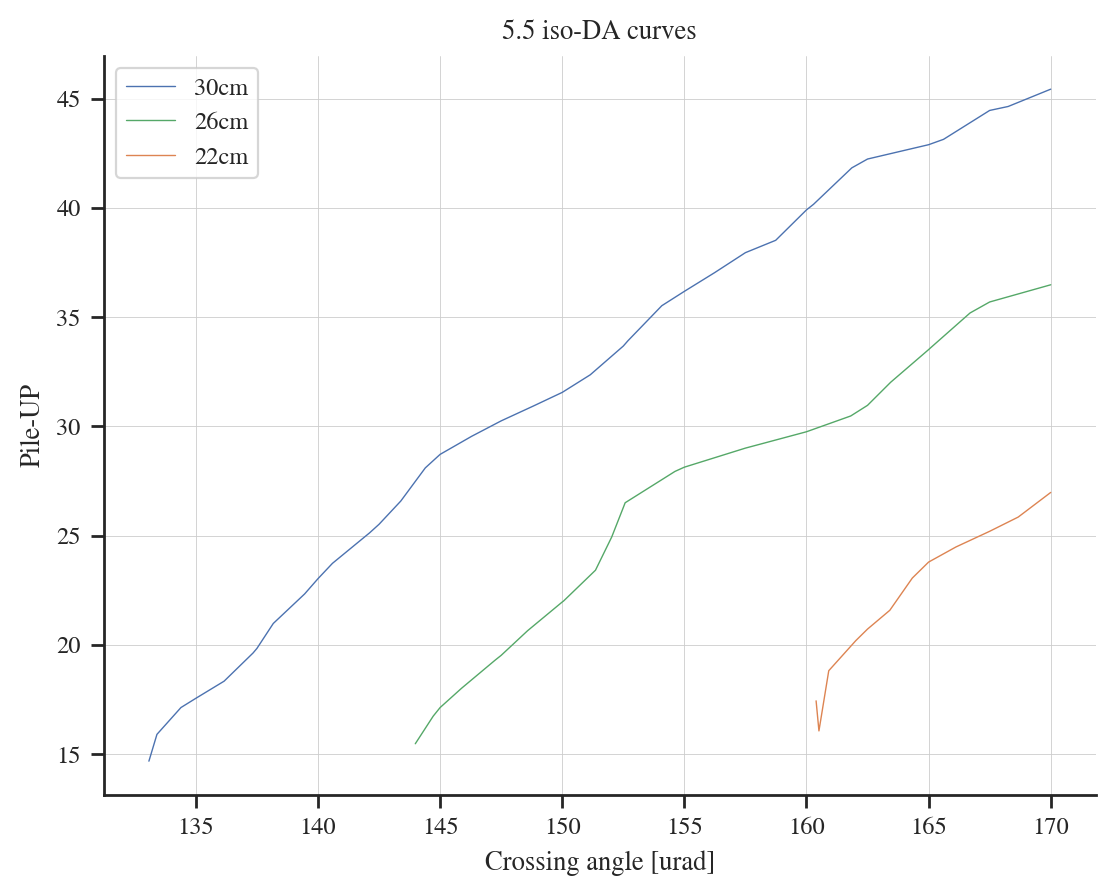

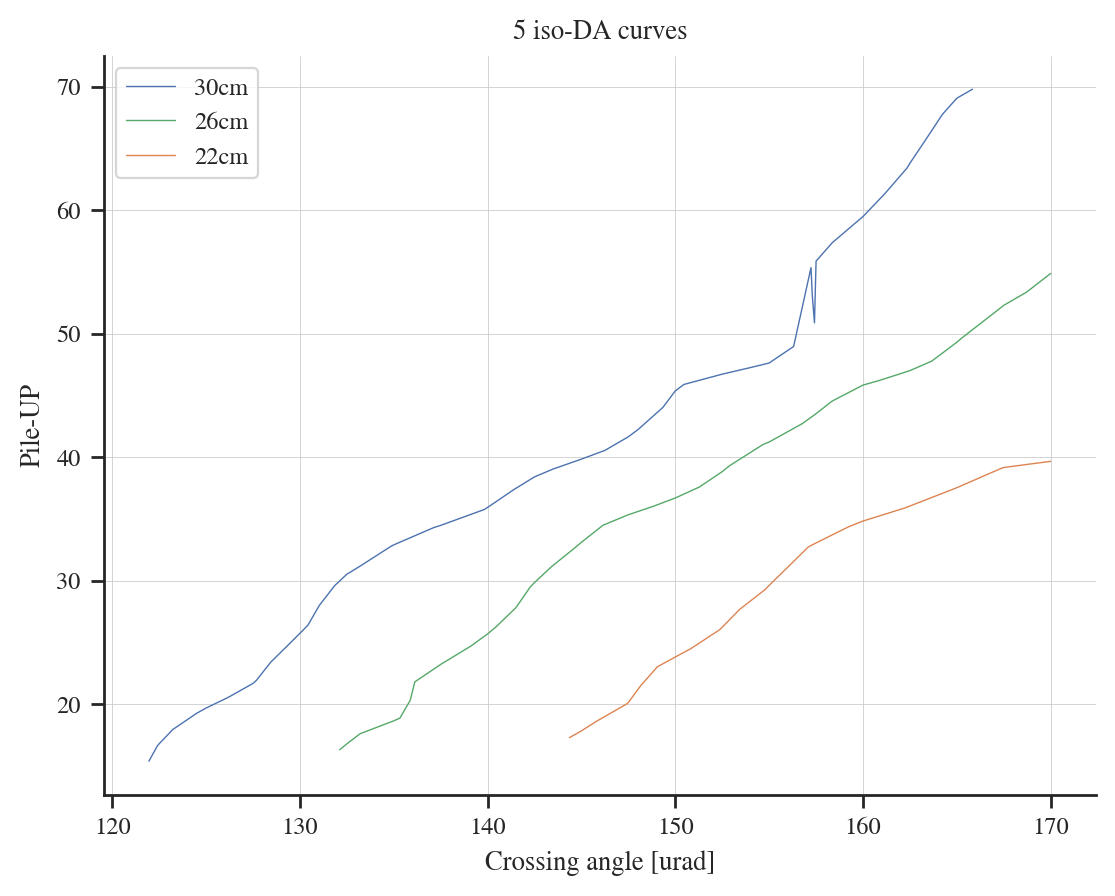

In [28]:
plt.plot(x_real_30cm,ll_PU[0], color = 'C0', label = '30cm')
plt.plot(x_real_26cm,ll_PU[1], color = 'C2', label = '26cm')
plt.plot(x_real_22cm,ll_PU[2], color = 'C1', label = '22cm')
plt.xlabel("Crossing angle [urad]")
plt.ylabel("Pile-UP")
plt.title("5.5 iso-DA curves")
#plt.ylim(0.6, 1.3)
plt.legend()
plt.grid()
plt.savefig('plots/iso_DA_5dot5_PU.pdf')
plt.show()


plt.plot(x_real_30cm_5sig,ll_PU_5sig[0], color = 'C0', label = '30cm')
plt.plot(x_real_26cm_5sig,ll_PU_5sig[1], color = 'C2', label = '26cm')
plt.plot(x_real_22cm_5sig,ll_PU_5sig[2], color = 'C1', label = '22cm')
plt.xlabel("Crossing angle [urad]")
plt.ylabel("Pile-UP")
plt.title("5 iso-DA curves")
#plt.ylim(0.6, 1.3)
plt.legend()
plt.grid()
plt.savefig('plots/iso_DA_5_PU.pdf')
plt.show()